# **Computational Drug Discovery : Comparing Regressors**

In Step 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **2. Load the data set**


In [2]:
df = pd.read_csv('acetylcholinesterase_05_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [3]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [4]:
# Examine X dimension
X.shape

(5103, 881)

In [5]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(5103, 140)

In [6]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [7]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [01:13<00:00,  1.75s/it]


In [8]:
# Performance table of the training set (80% subset)
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.63,0.68,0.91,5.82
HistGradientBoostingRegressor,0.61,0.67,0.92,7.74
LGBMRegressor,0.61,0.67,0.92,0.49
BaggingRegressor,0.61,0.67,0.93,0.74
XGBRegressor,0.60,0.65,0.94,3.24
MLPRegressor,0.56,0.62,0.99,11.89
SVR,0.54,0.60,1.01,4.19
KNeighborsRegressor,0.54,0.60,1.01,1.48
NuSVR,0.53,0.59,1.02,3.32


## **5. Data visualization of model performance**

[(0.0, 1.0)]

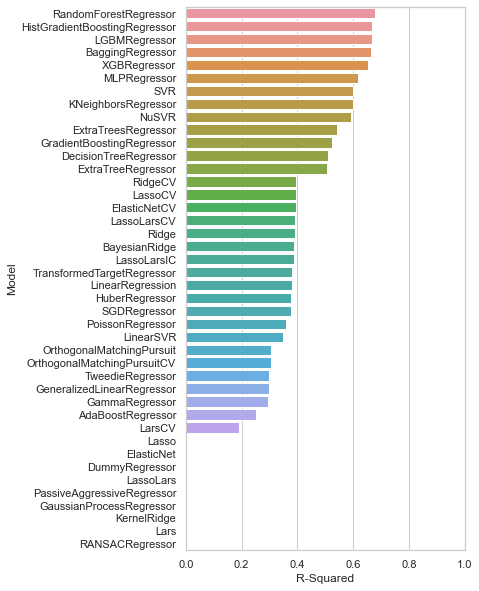

In [12]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

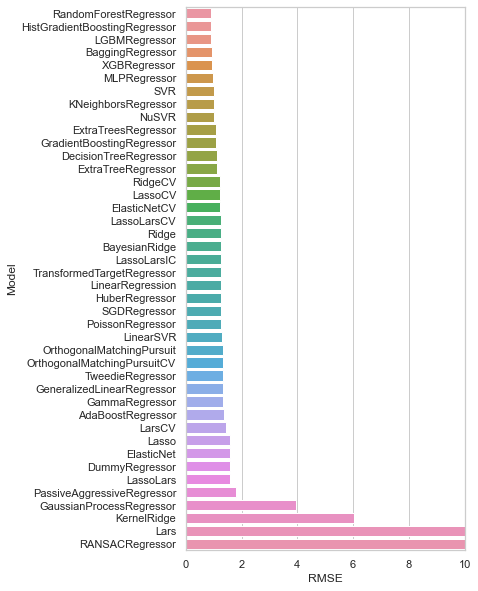

In [13]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="RMSE", data=predictions)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

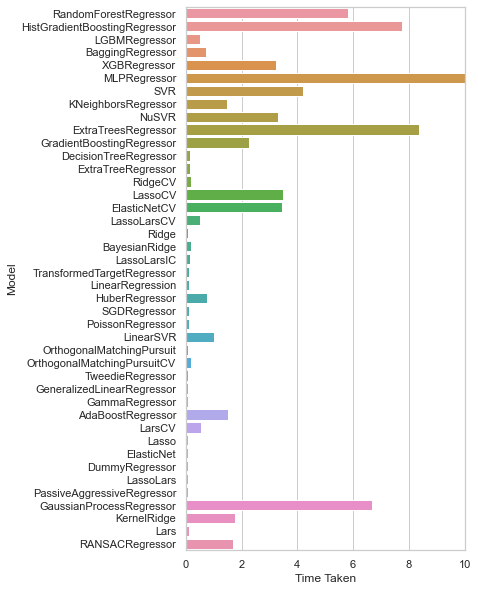

In [16]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Time Taken", data=predictions)
ax.set(xlim=(0, 10))